# Dispa-SET Post-processing

This Notebook illustrates how Dispa-SET simulation results can be loaded, analysed and plotted. It uses the functions provided within the PostProcessing.py file.

Sylvain Quoilin, Joint Research Centre

November 2016

### Load DispaSET and the required libraries:

In [3]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
#plt.style.use('seaborn-colorblind')
import pickle
import sys
sys.path.append("..")
import DispaSET as ds

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn-colorblind')
%matplotlib notebook

In [4]:
from DispaSET.postprocessing import postprocessing as post
reload(post)

<module 'DispaSET.postprocessing.postprocessing' from '../DispaSET/postprocessing/postprocessing.pyc'>

In [5]:
pd.options.display.max_rows = 60   #default 60 (None)
pd.options.display.max_columns = 60   #default 60 (None)
np.set_printoptions(threshold=1000)   #default 1000 (np.inf)

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx).

In [6]:
path_int = '../Simulations/simulation_GCC_int_int5'                      #With Trade international prices
#path_int_isolated = '../Simulations/simulation_GCC_int_isolated4'    #Without Trade international prices
#path_sub = '../Simulations/simulation_GCC_sub4'                      #With Trade subsidized prices
#path_sub_isolated = '../Simulations/simulation_GCC_sub_isolated4'    #Without Trade subsidized prices

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [8]:
inputs_int,results_int = ds.get_sim_results(path=path_int,cache=True)

[WARNING ] (get_sim_results): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected /Applications//GAMS26.1/sysdir as GAMS path on this computer


#This function reads the simulation environment folder once it has been solved and loads
#the input variables together with the results.
inputs_int,results_int = ds.get_sim_results(path=path_int,cache=False)
inputs_int_isolated,results_int_isolated = ds.get_sim_results(path=path_int_isolated,cache=False)
inputs_sub,results_sub = ds.get_sim_results(path=path_sub,cache=False)
inputs_sub_isolated,results_sub_isolated = ds.get_sim_results(path=path_sub_isolated,cache=False)

### Format the inputs as a dictionary of dataframes:

In [11]:
#Function that converts the dispaset data format into a dictionary of dataframes
datain_int = ds.ds_to_df(inputs_int)
#datain_int_isolated = ds.ds_to_df(inputs_int_isolated)
#datain_sub = ds.ds_to_df(inputs_sub)
#datain_sub_isolated = ds.ds_to_df(inputs_sub_isolated)

### Select the time period for plotting

In [12]:
rng = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-12-29 23:00:00',freq='h')
rng1 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-01-31 23:00:00',freq='h')
rng2 = pd.DatetimeIndex(start='2016-02-01 00:00:00',end='2016-02-29 23:00:00',freq='h')
rng3 = pd.DatetimeIndex(start='2016-03-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rng4 = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-04-30 23:00:00',freq='h')
rng5 = pd.DatetimeIndex(start='2016-05-01 00:00:00',end='2016-05-31 23:00:00',freq='h')
rng6 = pd.DatetimeIndex(start='2016-06-01 00:00:00',end='2016-06-30 23:00:00',freq='h')
rng7 = pd.DatetimeIndex(start='2016-07-01 00:00:00',end='2016-07-31 23:00:00',freq='h')
rng8 = pd.DatetimeIndex(start='2016-08-01 00:00:00',end='2016-08-31 23:00:00',freq='h')
rng9 = pd.DatetimeIndex(start='2016-09-01 00:00:00',end='2016-09-30 23:00:00',freq='h')
rng10 = pd.DatetimeIndex(start='2016-10-01 00:00:00',end='2016-10-31 23:00:00',freq='h')
rng11 = pd.DatetimeIndex(start='2016-11-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rng12 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')
rngsummer = pd.DatetimeIndex(start='2016-04-01 00:00:00',end='2016-11-30 23:00:00',freq='h')
rngwinter1 = pd.DatetimeIndex(start='2016-12-01 00:00:00',end='2016-12-31 23:00:00',freq='h')
rngwinter2 = pd.DatetimeIndex(start='2016-01-01 00:00:00',end='2016-03-31 23:00:00',freq='h')
rngwinter = rngwinter1.append(rngwinter2)

In [13]:
rng = pd.DatetimeIndex(start='2016-07-11 00:00:00',end='2016-07-17 23:00:00',freq='h')

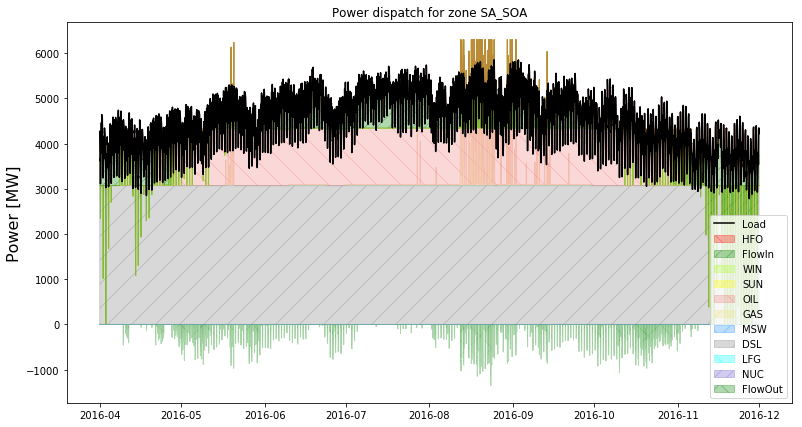

In [14]:
plotdata = post.get_plot_data(inputs_int, results_int, 'SA_SOA')
demand = post.get_demand(inputs_int, 'SA_SOA')
post.plot_dispatch(demand, plotdata, level=None, rng=rngsummer)

#plt.savefig('../Simulations/simulation_all_OneTest - MidJuly - Trade - Sub/Plots/SA_SOA.png',dpi=300,tight_layout='tight_box')


### -- General functions

In [15]:
#Reads the DispaSET results and provides useful general information to stdout
r_int = ds.get_result_analysis(inputs_int,results_int)


Average electricity cost : 6.49160273524499 EUR/MWh

Aggregated statistics for the considered area:
Total consumption:669.9406842450005 TWh
Peak load:116859.93399999998 MW
Net importations:0.0 TWh

Country-Specific values (in TWh or in MW):
               Demand   PeakLoad    NetImports  LoadShedding  Curtailment
SA_EOA     127.079527  19870.000  3.081573e+01           NaN          NaN
SA_RIYADH   81.918741  16102.450 -3.286835e+01           NaN          NaN
SA_QASSIM   15.467767   3012.087  1.520011e+01           NaN          NaN
SA_HAIL      5.936319   1190.738  3.472421e+00           NaN          NaN
SA_WOA      99.005586  18075.000 -1.585693e+01           NaN          NaN
SA_SOA      36.428948   5855.000  7.689307e+00           NaN          NaN
SA_NWOA      6.389343   1400.000  0.000000e+00           NaN          NaN
SA_NEOA      7.543903   1575.000  5.818178e+00           NaN          NaN
OM          31.189165   6069.440  3.513600e+00           NaN          NaN
KW          70.451

In [ ]:
#Reads the DispaSET results and provides useful general information to stdout
r_sub = ds.get_result_analysis(inputs_sub,results_sub)

In [ ]:
#Reads the DispaSET results and provides useful general information to stdout
r_int_isolated = ds.get_result_analysis(inputs_int_isolated,results_int_isolated)

In [ ]:
#Reads the DispaSET results and provides useful general information to stdout
r_sub_isolated = ds.get_result_analysis(inputs_sub_isolated,results_sub_isolated)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
(results_int['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
(results_sub['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost_int = (results_int['TotalNodeOperationCost'].sum()['SA_EOA']+results_int['TotalNodeOperationCost'].sum()['SA_HAIL']+results_int['TotalNodeOperationCost'].sum()['SA_NEOA']+results_int['TotalNodeOperationCost'].sum()['SA_NWOA']+results_int['TotalNodeOperationCost'].sum()['SA_QASSIM']+results_int['TotalNodeOperationCost'].sum()['SA_RIYADH']+results_int['TotalNodeOperationCost'].sum()['SA_SOA']+results_int['TotalNodeOperationCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost_int/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost_sub = (results_int['TotalNodeOperationCost'].sum()['SA_EOA']+results_sub['TotalNodeOperationCost'].sum()['SA_HAIL']+results_sub['TotalNodeOperationCost'].sum()['SA_NEOA']+results_sub['TotalNodeOperationCost'].sum()['SA_NWOA']+results_sub['TotalNodeOperationCost'].sum()['SA_QASSIM']+results_sub['TotalNodeOperationCost'].sum()['SA_RIYADH']+results_sub['TotalNodeOperationCost'].sum()['SA_SOA']+results_sub['TotalNodeOperationCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost_sub/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
SystemCost_int2 = results_int['TotalNodeOperationCost'].copy() #*(1/0.90383675)/(1000000)
SystemCost_int2['KSA'] = SystemCost_int2['SA_EOA']+SystemCost_int2['SA_HAIL']+SystemCost_int2['SA_NEOA']+SystemCost_int2['SA_NWOA']+SystemCost_int2['SA_QASSIM']+SystemCost_int2['SA_RIYADH']+SystemCost_int2['SA_SOA']+SystemCost_int2['SA_WOA']
SystemCost_int2.sum()*(1/0.90383675)/(1000000)


In [ ]:
A = pd.Series(((results_int['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE']).sum())
A.name = 'KSA'
SystemCost_int = pd.DataFrame((results_int['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000))
SystemCost_int = SystemCost_int.append(A, ignore_index=False)
SystemCost_int.columns = ['SystemCost']
SystemCost_int

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
SystemCost_sub2 = results_sub['TotalNodeOperationCost'].copy() #*(1/0.90383675)/(1000000)
SystemCost_sub2['KSA'] = SystemCost_sub2['SA_EOA']+SystemCost_sub2['SA_HAIL']+SystemCost_sub2['SA_NEOA']+SystemCost_sub2['SA_NWOA']+SystemCost_sub2['SA_QASSIM']+SystemCost_sub2['SA_RIYADH']+SystemCost_sub2['SA_SOA']+SystemCost_sub2['SA_WOA']
SystemCost_sub2.sum()*(1/0.90383675)/(1000000)


In [ ]:
A = pd.Series(((results_sub['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE']).sum())
A.name = 'KSA'
SystemCost_sub = pd.DataFrame((results_sub['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000))
SystemCost_sub = SystemCost_sub.append(A, ignore_index=False)
SystemCost_sub.columns = ['SystemCost']
SystemCost_sub

In [ ]:
SystemCost_int.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='System Cost in $ Millions')


In [ ]:
SystemCost_sub.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='System Cost in $ Millions')



In [ ]:
#Total output system cost in Millions $ (converted from euros €)
(results_int_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
(results_sub_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost_int_isolated = (results_int_isolated['TotalNodeOperationCost'].sum()['SA_EOA']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_HAIL']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_NEOA']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_NWOA']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_QASSIM']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_RIYADH']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_SOA']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost_int_isolated/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost_sub_isolated = (results_sub_isolated['TotalNodeOperationCost'].sum()['SA_EOA']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_HAIL']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_NEOA']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_NWOA']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_QASSIM']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_RIYADH']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_SOA']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost_sub_isolated/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
SystemCost_int_isolated2 = results_int_isolated['TotalNodeOperationCost'].copy() #*(1/0.90383675)/(1000000)
SystemCost_int_isolated2['KSA'] = SystemCost_int_isolated2['SA_EOA']+SystemCost_int_isolated2['SA_HAIL']+SystemCost_int_isolated2['SA_NEOA']+SystemCost_int_isolated2['SA_NWOA']+SystemCost_int_isolated2['SA_QASSIM']+SystemCost_int_isolated2['SA_RIYADH']+SystemCost_int_isolated2['SA_SOA']+SystemCost_int_isolated2['SA_WOA']
SystemCost_int_isolated2.sum()*(1/0.90383675)/(1000000)


In [ ]:
A = pd.Series(((results_int_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE']).sum())
A.name = 'KSA'
SystemCost_int_isolated = pd.DataFrame((results_int_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000))
SystemCost_int_isolated = SystemCost_int_isolated.append(A, ignore_index=False)
SystemCost_int_isolated.columns = ['SystemCost']
SystemCost_int_isolated

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
SystemCost_sub_isolated2 = results_sub_isolated['TotalNodeOperationCost'].copy() #*(1/0.90383675)/(1000000)
SystemCost_sub_isolated2['KSA'] = SystemCost_sub_isolated2['SA_EOA']+SystemCost_sub_isolated2['SA_HAIL']+SystemCost_sub_isolated2['SA_NEOA']+SystemCost_sub_isolated2['SA_NWOA']+SystemCost_sub_isolated2['SA_QASSIM']+SystemCost_sub_isolated2['SA_RIYADH']+SystemCost_sub_isolated2['SA_SOA']+SystemCost_sub_isolated2['SA_WOA']
SystemCost_sub_isolated2.sum()*(1/0.90383675)/(1000000)


In [ ]:
A = pd.Series(((results_sub_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE']).sum())
A.name = 'KSA'
SystemCost_sub_isolated = pd.DataFrame((results_sub_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000))
SystemCost_sub_isolated = SystemCost_sub_isolated.append(A, ignore_index=False)
SystemCost_sub_isolated.columns = ['SystemCost']
SystemCost_sub_isolated

In [ ]:
SystemCost_int_isolated.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='System Cost in $ Millions')


In [ ]:
SystemCost_sub_isolated.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='System Cost in $ Millions')


In [ ]:
#Total output system cost in Millions $ (converted from euros €)
results_int['TotalNodeOperationCost'].sum().sum()*(1/0.90383675)/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
results_sub['TotalNodeOperationCost'].sum().sum()*(1/0.90383675)/(1000000)

In [ ]:
#Total output system cost in Millions$ (converted from euros €)
results_int_isolated['TotalNodeOperationCost'].sum().sum()*(1/0.90383675)/(1000000)

In [ ]:
#Total output system cost in Millions$ (converted from euros €)
results_sub_isolated['TotalNodeOperationCost'].sum().sum()*(1/0.90383675)/(1000000)

In [ ]:
A = datain_int['Demand']['DA'].head(5)
A.drop(['BA','KW','OM','QA','UAE'], axis=1)

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
(results_int['TotalNodeOperationCost']*(1/0.90383675)) / datain_int['Demand']['DA']

#Average electricity cost in $/MWh (converted from euros €)
A = pd.Series((datain_int['Demand']['DA'].drop(['BA','KW','OM','QA','UAE'])).sum())
A.name = 'KSA'
System_demand_int = pd.DataFrame(datain_int['Demand']['DA'])
System_demand_int = System_demand_int.append(A, ignore_index=False)
System_demand_int.columns = ['TotalDemand']
elec_cost_int = pd.Series(SystemCost_int['SystemCost']*(1000000), index=SystemCost_int.index)/pd.Series(System_demand_int['TotalDemand'], index=System_demand_int.index)
elec_cost_int

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
(results_int['TotalNodeOperationCost'].sum()*(1/0.90383675)) / datain_int['Demand']['DA'].sum()

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
(results_sub['TotalNodeOperationCost'].sum()*(1/0.90383675)) / datain_sub['Demand']['DA'].sum()

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
KSA_Demand_int = datain_int['Demand']['DA']['SA_EOA'].sum()+datain_int['Demand']['DA']['SA_HAIL'].sum()+datain_int['Demand']['DA']['SA_NEOA'].sum()+datain_int['Demand']['DA']['SA_NWOA'].sum()+datain_int['Demand']['DA']['SA_QASSIM'].sum()+datain_int['Demand']['DA']['SA_RIYADH'].sum()+datain_int['Demand']['DA']['SA_SOA'].sum()+datain_int['Demand']['DA']['SA_WOA'].sum()
KSA_elec_cost_int = KSA_Cost_int/KSA_Demand_int
KSA_elec_cost_int

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
KSA_Demand_sub = datain_sub['Demand']['DA']['SA_EOA'].sum()+datain_sub['Demand']['DA']['SA_HAIL'].sum()+datain_sub['Demand']['DA']['SA_NEOA'].sum()+datain_sub['Demand']['DA']['SA_NWOA'].sum()+datain_sub['Demand']['DA']['SA_QASSIM'].sum()+datain_sub['Demand']['DA']['SA_RIYADH'].sum()+datain_sub['Demand']['DA']['SA_SOA'].sum()+datain_int['Demand']['DA']['SA_WOA'].sum()
KSA_elec_cost_sub = KSA_Cost_sub/KSA_Demand_sub
KSA_elec_cost_sub

In [ ]:
#*(1/0.90383675)/(1000000)
TotalZoneOperationCost = results_int['TotalNodeOperationCost']*(1/0.90383675)
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)

TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)
TotalZoneOperationCost


In [ ]:
NodeDemand = datain_int['Demand']['DA']
BBB = pd.DataFrame(NodeDemand[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA_Demand = BBB.sum(axis=1)

NodeDemand['KSA']= pd.Series(KSA_Demand.values, index=NodeDemand.index)
NodeDemand


In [ ]:
TotalZoneOperationCost.div(NodeDemand).mean()

In [ ]:
A = pd.Series(((results_int['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE']).sum())
A.name = 'KSA'
SystemCost_int = pd.DataFrame((results_int['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000))
SystemCost_int = SystemCost_int.append(A, ignore_index=False)
SystemCost_int.columns = ['SystemCost']
SystemCost_int

#Average electricity cost in $/MWh (converted from euros €)
A = pd.Series((datain_int['Demand']['DA'].sum().drop(['BA','KW','OM','QA','UAE'])).sum())
A.name = 'KSA'
System_demand_int = pd.DataFrame(datain_int['Demand']['DA'].sum())
System_demand_int = System_demand_int.append(A, ignore_index=False)
System_demand_int.columns = ['TotalDemand']
elec_cost_int = pd.Series(SystemCost_int['SystemCost']*(1000000), index=SystemCost_int.index)/pd.Series(System_demand_int['TotalDemand'], index=System_demand_int.index)
elec_cost_int

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
A = pd.Series((datain_sub['Demand']['DA'].sum().drop(['BA','KW','OM','QA','UAE'])).sum())
A.name = 'KSA'
System_demand_sub = pd.DataFrame(datain_int['Demand']['DA'].sum())
System_demand_sub = System_demand_sub.append(A, ignore_index=False)
System_demand_sub.columns = ['TotalDemand']
elec_cost_sub = pd.Series(SystemCost_int['SystemCost']*(1000000), index=SystemCost_sub.index)/pd.Series(System_demand_sub['TotalDemand'], index=System_demand_sub.index)
elec_cost_sub

In [ ]:
elec_cost_int2 = pd.DataFrame(elec_cost_int,columns=['ElectricityPrice'])
elec_cost_int2.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='Average electricity price in $/MWh')


In [ ]:
elec_cost_sub2 = pd.DataFrame(elec_cost_sub,columns=['ElectricityPrice'])
elec_cost_sub2.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='Average electricity price in $/MWh')


In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
(results_int_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675)) / datain_int_isolated['Demand']['DA'].sum()

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
(results_sub_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675)) / datain_sub_isolated['Demand']['DA'].sum()

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
KSA_Demand_int_isolated = datain_int_isolated['Demand']['DA']['SA_EOA'].sum()+datain_int_isolated['Demand']['DA']['SA_HAIL'].sum()+datain_int_isolated['Demand']['DA']['SA_NEOA'].sum()+datain_int_isolated['Demand']['DA']['SA_NWOA'].sum()+datain_int_isolated['Demand']['DA']['SA_QASSIM'].sum()+datain_int_isolated['Demand']['DA']['SA_RIYADH'].sum()+datain_int_isolated['Demand']['DA']['SA_SOA'].sum()+datain_int_isolated['Demand']['DA']['SA_WOA'].sum()
KSA_elec_cost_int_isolated = KSA_Cost_int_isolated/KSA_Demand_int_isolated
KSA_elec_cost_int_isolated

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
KSA_Demand_sub_isolated = datain_sub_isolated['Demand']['DA']['SA_EOA'].sum()+datain_sub_isolated['Demand']['DA']['SA_HAIL'].sum()+datain_int_isolated['Demand']['DA']['SA_NEOA'].sum()+datain_int_isolated['Demand']['DA']['SA_NWOA'].sum()+datain_int_isolated['Demand']['DA']['SA_QASSIM'].sum()+datain_int_isolated['Demand']['DA']['SA_RIYADH'].sum()+datain_int_isolated['Demand']['DA']['SA_SOA'].sum()+datain_int_isolated['Demand']['DA']['SA_WOA'].sum()
KSA_elec_cost_sub_isolated = KSA_Cost_sub_isolated/KSA_Demand_sub_isolated
KSA_elec_cost_sub_isolated

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
A = pd.Series((datain_int_isolated['Demand']['DA'].sum().drop(['BA','KW','OM','QA','UAE'])).sum())
A.name = 'KSA'
System_demand_int_isolated = pd.DataFrame(datain_int_isolated['Demand']['DA'].sum())
System_demand_int_isolated = System_demand_int_isolated.append(A, ignore_index=False)
System_demand_int_isolated.columns = ['TotalDemand']
elec_cost_int_isolated = pd.Series(SystemCost_int_isolated['SystemCost']*(1000000), index=SystemCost_int_isolated.index)/pd.Series(System_demand_int_isolated['TotalDemand'], index=System_demand_int_isolated.index)
elec_cost_int_isolated

In [ ]:
#Average electricity cost in $/MWh (converted from euros €)
A = pd.Series((datain_sub_isolated['Demand']['DA'].sum().drop(['BA','KW','OM','QA','UAE'])).sum())
A.name = 'KSA'
System_demand_sub_isolated = pd.DataFrame(datain_sub_isolated['Demand']['DA'].sum())
System_demand_sub_isolated = System_demand_sub_isolated.append(A, ignore_index=False)
System_demand_sub_isolated.columns = ['TotalDemand']
elec_cost_sub_isolated = pd.Series(SystemCost_sub_isolated['SystemCost']*(1000000), index=SystemCost_sub_isolated.index)/pd.Series(System_demand_sub_isolated['TotalDemand'], index=System_demand_sub_isolated.index)
elec_cost_sub_isolated

In [ ]:
elec_cost_int_isolated2 = pd.DataFrame(elec_cost_int_isolated,columns=['ElectricityPrice'])
elec_cost_int_isolated2.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='Average electricity price in $/MWh')


In [ ]:
elec_cost_sub_isolated2 = pd.DataFrame(elec_cost_sub_isolated,columns=['ElectricityPrice'])
elec_cost_sub_isolated2.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']).plot.bar(title='Average electricity price in $/MWh')


In [ ]:
#This function sorts the power generation curves of the different units by technology
post.aggregate_by_fuel(results_int['UnitOutputPower'], inputs_int, SpecifyFuels=None).head(5)

In [ ]:
#This function sorts the power generation curves of the different units by technology
post.aggregate_by_fuel(results_sub['UnitOutputPower'], inputs_sub, SpecifyFuels=None).head(5)

In [ ]:
#This function sorts the power generation curves of the different units by technology
post.aggregate_by_fuel(results_int_isolated['UnitOutputPower'], inputs_int_isolated, SpecifyFuels=None).head(5)

In [ ]:
#This function sorts the power generation curves of the different units by technology
post.aggregate_by_fuel(results_sub_isolated['UnitOutputPower'], inputs_sub_isolated, SpecifyFuels=None).head(5)

In [ ]:
NewOutputFlow_int = results_int['PowerFlow'].copy()
OriginalColumns_int = []
reverseindex = []
for j,column in enumerate(NewOutputFlow_int):
    A = column.split(' -> ')
    OriginalColumns_int.append(A)
    B = list(reversed(A))
    if B in OriginalColumns_int:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns_int) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow_int.iloc[:,D] = NewOutputFlow_int.iloc[:,D] - NewOutputFlow_int.iloc[:,j]
NewOutputFlow_int = NewOutputFlow_int.drop(NewOutputFlow_int.columns[reverseindex], axis=1).copy()
NewOutputFlow_int.head(5)


In [ ]:
NewOutputFlow_sub = results_sub['PowerFlow'].copy()
OriginalColumns_sub = []
reverseindex = []
for j,column in enumerate(NewOutputFlow_sub):
    A = column.split(' -> ')
    OriginalColumns_sub.append(A)
    B = list(reversed(A))
    if B in OriginalColumns_sub:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns_sub) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow_sub.iloc[:,D] = NewOutputFlow_sub.iloc[:,D] - NewOutputFlow_sub.iloc[:,j]
NewOutputFlow_sub = NewOutputFlow_sub.drop(NewOutputFlow_sub.columns[reverseindex], axis=1).copy()
NewOutputFlow_sub.head(5)

In [ ]:
pd.DataFrame((NewOutputFlow_int.sum()/(1000000)),columns=['Power traded']).drop(['SA_EOA -> SA_RIYADH','SA_HAIL -> SA_NEOA','SA_QASSIM -> SA_HAIL','SA_QASSIM -> SA_WOA','SA_RIYADH -> SA_QASSIM','SA_WOA -> SA_SOA']).plot.bar(title='Power traded in TWh')


In [ ]:
pd.DataFrame((NewOutputFlow_sub.sum()/(1000000)),columns=['Power traded']).drop(['SA_EOA -> SA_RIYADH','SA_HAIL -> SA_NEOA','SA_QASSIM -> SA_HAIL','SA_QASSIM -> SA_WOA','SA_RIYADH -> SA_QASSIM','SA_WOA -> SA_SOA']).plot.bar(title='Power traded in TWh')


In [ ]:
results_int_isolated['NetExportedPower'].plot()

In [ ]:
results_sub_isolated['NetExportedPower'].plot()

In [ ]:
NewOutputFlow_int_isolated = results_int_isolated['PowerFlow'].copy()
OriginalColumns_int_isolated = []
reverseindex = []
for j,column in enumerate(NewOutputFlow_int_isolated):
    A = column.split(' -> ')
    OriginalColumns_int_isolated.append(A)
    B = list(reversed(A))
    if B in OriginalColumns_int_isolated:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns_int_isolated) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow_int_isolated.iloc[:,D] = NewOutputFlow_int_isolated.iloc[:,D] - NewOutputFlow_int_isolated.iloc[:,j]
NewOutputFlow_int_isolated = NewOutputFlow_int_isolated.drop(NewOutputFlow_int_isolated.columns[reverseindex], axis=1).copy()
NewOutputFlow_int_isolated.head(5)

In [ ]:
NewOutputFlow_sub_isolated = results_sub_isolated['PowerFlow'].copy()
OriginalColumns_sub_isolated = []
reverseindex = []
for j,column in enumerate(NewOutputFlow_sub_isolated):
    A = column.split(' -> ')
    OriginalColumns_sub_isolated.append(A)
    B = list(reversed(A))
    if B in OriginalColumns_sub_isolated:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns_sub_isolated) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow_sub_isolated.iloc[:,D] = NewOutputFlow_sub_isolated.iloc[:,D] - NewOutputFlow_sub_isolated.iloc[:,j]
NewOutputFlow_sub_isolated = NewOutputFlow_sub_isolated.drop(NewOutputFlow_sub_isolated.columns[reverseindex], axis=1).copy()
NewOutputFlow_sub_isolated.head(5)

In [ ]:
columns = []
for i,column in enumerate(NewOutputFlow_int):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows_int = NewOutputFlow_int.drop(NewOutputFlow_int.columns[columns], axis=1).copy()
ax = GCCFlows_int.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

In [ ]:
columns = []
for i,column in enumerate(NewOutputFlow_int):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows_sub = NewOutputFlow_sub.drop(NewOutputFlow_int.columns[columns], axis=1).copy()
ax = GCCFlows_sub.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

In [ ]:
results_int['NodeShadowPrice'].drop(columns=[ 'SA_RIYADH','SA_QASSIM', 'SA_HAIL',  'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()


In [ ]:
results_sub['NodeShadowPrice'].drop(columns=[ 'SA_RIYADH','SA_QASSIM', 'SA_HAIL',  'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()


In [ ]:
results_int_isolated['NodeShadowPrice'].drop(columns=[ 'SA_RIYADH','SA_QASSIM', 'SA_HAIL',  'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()


In [ ]:
results_sub_isolated['NodeShadowPrice'].drop(columns=[ 'SA_RIYADH','SA_QASSIM', 'SA_HAIL',  'SA_WOA', 'SA_SOA', 'SA_NWOA', 'SA_NEOA','SA_NEOA' ]).plot()



In [ ]:
PPindicators_int = post.get_indicators_powerplant(inputs_int,results_int)
PPindicators_int.head(5)

In [ ]:
PPindicators_sub = post.get_indicators_powerplant(inputs_sub,results_sub)
PPindicators_sub.head(5)

In [ ]:
PPindicators_int_isolated = post.get_indicators_powerplant(inputs_int_isolated,results_int_isolated)
PPindicators_int_isolated.head(5)

In [ ]:
PPindicators_sub_isolated = post.get_indicators_powerplant(inputs_sub_isolated,results_sub_isolated)
PPindicators_sub_isolated.head(5)

In [ ]:
fuels = PPindicators_int.Fuel.unique()
countries = PPindicators_int.Zone.unique()

GenPerCountry = pd.DataFrame(index=countries, columns=fuels)
# First make sure that all fuels are present. If not, initialize an empty series
for f in ['NUC', 'LFG', 'DSL', 'MSW', 'GAS', 'OIL', 'WST', 'SUN', 'WIN', 'FlowIn', 'HFO']:
    if f not in GenPerCountry:
        GenPerCountry[f] = 0
for c in countries:
    for f in fuels:
        tmp = PPindicators_int[(PPindicators_int.Fuel == f) & (PPindicators_int.Zone == c)]
        GenPerCountry.loc[c, f] = tmp.Generation.sum()
    NetImports = post.get_imports(results_int['PowerFlow'], c)
    if NetImports > 0:
        GenPerCountry.loc[c, 'FlowIn'] = NetImports
GenPerCountry_int = GenPerCountry
A = GenPerCountry_int.drop(['BA','KW','OM','QA','UAE']).sum()
A.name = 'KSA'
GenPerCountry_int = GenPerCountry_int.append(A, ignore_index=False)
GenPerCountry_int

In [ ]:
fuels = PPindicators_sub.Fuel.unique()
countries = PPindicators_sub.Zone.unique()

GenPerCountry = pd.DataFrame(index=countries, columns=fuels)
# First make sure that all fuels are present. If not, initialize an empty series
for f in ['NUC', 'LFG', 'DSL', 'MSW', 'GAS', 'OIL', 'WST', 'SUN', 'WIN', 'FlowIn', 'HFO']:
    if f not in GenPerCountry:
        GenPerCountry[f] = 0
for c in countries:
    for f in fuels:
        tmp = PPindicators_sub[(PPindicators_sub.Fuel == f) & (PPindicators_int.Zone == c)]
        GenPerCountry.loc[c, f] = tmp.Generation.sum()
    NetImports = post.get_imports(results_sub['PowerFlow'], c)
    if NetImports > 0:
        GenPerCountry.loc[c, 'FlowIn'] = NetImports
GenPerCountry_sub = GenPerCountry
A = GenPerCountry_sub.drop(['BA','KW','OM','QA','UAE']).sum()
A.name = 'KSA'
GenPerCountry_sub = GenPerCountry_sub.append(A, ignore_index=False)
GenPerCountry_sub

In [ ]:
fuels = PPindicators_int_isolated.Fuel.unique()
countries = PPindicators_int_isolated.Zone.unique()

GenPerCountry = pd.DataFrame(index=countries, columns=fuels)
# First make sure that all fuels are present. If not, initialize an empty series
for f in ['NUC', 'LFG', 'DSL', 'MSW', 'GAS', 'OIL', 'WST', 'SUN', 'WIN', 'FlowIn', 'HFO']:
    if f not in GenPerCountry:
        GenPerCountry[f] = 0
for c in countries:
    for f in fuels:
        tmp = PPindicators_int_isolated[(PPindicators_int_isolated.Fuel == f) & (PPindicators_int_isolated.Zone == c)]
        GenPerCountry.loc[c, f] = tmp.Generation.sum()
    NetImports = post.get_imports(results_int_isolated['PowerFlow'], c)
    if NetImports > 0:
        GenPerCountry.loc[c, 'FlowIn'] = NetImports
GenPerCountry_int_isolated = GenPerCountry
A = GenPerCountry_int_isolated.drop(['BA','KW','OM','QA','UAE']).sum()
A.name = 'KSA'
GenPerCountry_int_isolated = GenPerCountry_int_isolated.append(A, ignore_index=False)
GenPerCountry_int_isolated

In [ ]:
fuels = PPindicators_sub_isolated.Fuel.unique()
countries = PPindicators_sub_isolated.Zone.unique()

GenPerCountry = pd.DataFrame(index=countries, columns=fuels)
# First make sure that all fuels are present. If not, initialize an empty series
for f in ['NUC', 'LFG', 'DSL', 'MSW', 'GAS', 'OIL', 'WST', 'SUN', 'WIN', 'FlowIn', 'HFO']:
    if f not in GenPerCountry:
        GenPerCountry[f] = 0
for c in countries:
    for f in fuels:
        tmp = PPindicators_sub_isolated[(PPindicators_sub_isolated.Fuel == f) & (PPindicators_sub_isolated.Zone == c)]
        GenPerCountry.loc[c, f] = tmp.Generation.sum()
    NetImports = post.get_imports(results_sub_isolated['PowerFlow'], c)
    if NetImports > 0:
        GenPerCountry.loc[c, 'FlowIn'] = NetImports
GenPerCountry_sub_isolated = GenPerCountry
A = GenPerCountry_sub_isolated.drop(['BA','KW','OM','QA','UAE']).sum()
A.name = 'KSA'
GenPerCountry_sub_isolated = GenPerCountry_sub_isolated.append(A, ignore_index=False)
GenPerCountry_sub_isolated

In [ ]:
# With Trade - Without Trade (The change due to trade: '+':increase ,,, '-':decrease)
GenPerCountry_diff = GenPerCountry_int - GenPerCountry_int_isolated
GenPerCountry_diff.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])

In [ ]:
# With Trade - Without Trade (The change due to trade: '+':increase ,,, '-':decrease)
GenPerCountry_diff = GenPerCountry_sub - GenPerCountry_sub_isolated
GenPerCountry_diff.drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])

In [ ]:
# With Trade - Without Trade (The change due to trade: '+':increase ,,, '-':decrease)  [in Millions $]
(SystemCost_int - SystemCost_int_isolated).drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])

In [ ]:
# With Trade - Without Trade (The change due to trade: '+':increase ,,, '-':decrease)  [in Millions $]
(SystemCost_sub - SystemCost_sub_isolated).drop(['SA_EOA','SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
((results_int['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE'])
(results_int['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost_int = (results_int['TotalNodeOperationCost'].sum()['SA_EOA']+results_int['TotalNodeOperationCost'].sum()['SA_HAIL']+results_int['TotalNodeOperationCost'].sum()['SA_NEOA']+results_int['TotalNodeOperationCost'].sum()['SA_NWOA']+results_int['TotalNodeOperationCost'].sum()['SA_QASSIM']+results_int['TotalNodeOperationCost'].sum()['SA_RIYADH']+results_int['TotalNodeOperationCost'].sum()['SA_SOA']+results_int['TotalNodeOperationCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost_int/(1000000)

#Total output system cost in Millions $ (converted from euros €)
(results_int_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost_int_isolated = (results_int_isolated['TotalNodeOperationCost'].sum()['SA_EOA']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_HAIL']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_NEOA']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_NWOA']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_QASSIM']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_RIYADH']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_SOA']+results_int_isolated['TotalNodeOperationCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost_int_isolated/(1000000)

In [ ]:
#Total output system cost in Millions $ (converted from euros €)
((results_sub['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)).drop(['BA','KW','OM','QA','UAE'])
(results_sub['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost_sub = (results_int['TotalNodeOperationCost'].sum()['SA_EOA']+results_sub['TotalNodeOperationCost'].sum()['SA_HAIL']+results_sub['TotalNodeOperationCost'].sum()['SA_NEOA']+results_sub['TotalNodeOperationCost'].sum()['SA_NWOA']+results_sub['TotalNodeOperationCost'].sum()['SA_QASSIM']+results_sub['TotalNodeOperationCost'].sum()['SA_RIYADH']+results_sub['TotalNodeOperationCost'].sum()['SA_SOA']+results_sub['TotalNodeOperationCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost_sub/(1000000)

#Total output system cost in Millions $ (converted from euros €)
(results_sub_isolated['TotalNodeOperationCost'].sum()*(1/0.90383675))/(1000000)
#Total output system cost in Millions $ (converted from euros €)
KSA_Cost_sub_isolated = (results_sub_isolated['TotalNodeOperationCost'].sum()['SA_EOA']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_HAIL']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_NEOA']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_NWOA']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_QASSIM']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_RIYADH']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_SOA']+results_sub_isolated['TotalNodeOperationCost'].sum()['SA_WOA'])*(1/0.90383675)
KSA_Cost_sub_isolated/(1000000)

In [ ]:
#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_country_fuel(datain_int,results_int,PPindicators_int)

In [ ]:
#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_country_fuel(datain_sub,results_sub,PPindicators_sub)

In [ ]:
#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_country_fuel(datain_int_isolated,results_int_isolated,PPindicators_int_isolated)

In [ ]:
#Plots the generation for each country, disaggregated by fuel type
ax = ds.plot_energy_country_fuel(datain_sub_isolated,results_sub_isolated,PPindicators_sub_isolated)

In [ ]:
# Function that determines generation self sufficiency of each country by computing (local generation - local demand)
post.Local_generation_minus_demand(inputs_int, results_int).head(5)

In [ ]:
# Function that determines generation self sufficiency of each country by computing (local generation - local demand)
post.Local_generation_minus_demand(inputs_sub, results_sub).head(5)

In [ ]:
# Function that determines generation self sufficiency of each country by computing (local generation - local demand)
post.Local_generation_minus_demand(inputs_int_isolated, results_int_isolated).head(5)

In [ ]:
# Function that determines generation self sufficiency of each country by computing (local generation - local demand)
post.Local_generation_minus_demand(inputs_sub_isolated, results_sub_isolated).head(5)

In [ ]:
# Function that computes the generation cost for each zone at each instant of time
# Generation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_nodes_generation_cost(inputs_int, results_int).head(5)

In [ ]:
# Function that computes the generation cost for each zone at each instant of time
# Generation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_nodes_generation_cost(inputs_sub, results_sub).head(5)

In [ ]:
# Function that computes the generation cost for each zone at each instant of time
# Generation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_nodes_generation_cost(inputs_int_isolated, results_int_isolated).head(5)

In [ ]:
# Function that computes the generation cost for each zone at each instant of time
# Generation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_nodes_generation_cost(inputs_sub_isolated, results_sub_isolated).head(5)

In [ ]:
#Function that computes the balance of the imports/exports of a given zone
# (NetImports)
post.get_imports(results_int['PowerFlow'], 'QA')

In [ ]:
#Function that computes the balance of the imports/exports of a given zone
# (NetImports)
post.get_imports(results_sub['PowerFlow'], 'QA')

In [ ]:
#Function that computes the balance of the imports/exports of a given zone
# (NetImports)
post.get_imports(results_int_isolated['PowerFlow'], 'QA')

In [ ]:
#Function that computes the balance of the imports/exports of a given zone
# (NetImports)
post.get_imports(results_sub_isolated['PowerFlow'], 'QA')

In [ ]:
#This function filters the dispaset Output Power dataframe by country
post.filter_by_country(results_int['UnitOutputPower'], inputs_int, 'QA').head(5)

In [ ]:
#This function filters the dispaset Output Power dataframe by country
post.filter_by_country(results_sub['UnitOutputPower'], inputs_sub, 'QA').head(5)

In [ ]:
#This function filters the dispaset Output Power dataframe by country
post.filter_by_country(results_int_isolated['UnitOutputPower'], inputs_int_isolated, 'QA').head(5)

In [ ]:
#This function filters the dispaset Output Power dataframe by country
post.filter_by_country(results_sub_isolated['UnitOutputPower'], inputs_sub_isolated, 'QA').head(5)

In [ ]:
# Function that computes the operation cost for each power unit at each instant of time 
# Operation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_units_operation_cost(inputs_int, results_int).head(5)

In [ ]:
# Function that computes the operation cost for each power unit at each instant of time 
# Operation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_units_operation_cost(inputs_sub, results_sub).head(5)

In [ ]:
# Function that computes the operation cost for each power unit at each instant of time 
# Operation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_units_operation_cost(inputs_int_isolated, results_int_isolated).head(5)

In [ ]:
# Function that computes the operation cost for each power unit at each instant of time 
# Operation cost includes: CostFixed + CostStartUp + CostShutDown + CostRampUp + CostRampDown + CostVariable
post.get_units_operation_cost(inputs_sub_isolated, results_sub_isolated).head(5)

## Compare total system operation cost (No trade vs Trade) & (Int vs subsidized prices)

In [ ]:
AA = results_int['TotalSystemCost']*(1/0.90383675)/(1000000)
AA.plot()
print AA.sum()
print AA['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()    #Summer
print AA['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum() + AA['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum()   #Winter


In [ ]:
AA.resample('D').sum().plot()

In [ ]:
fig,ax = plt.subplots()
AA.resample('M').sum().plot(x_compat=True,ax=ax)
ax.xaxis.set_tick_params(reset=True)
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))

plt.show()

In [ ]:
AA = results_sub['TotalSystemCost']*(1/0.90383675)/(1000000)
AA.plot()
print AA.sum()
print AA['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()    #Summer
print AA['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum() + AA['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum()   #Winter


In [ ]:
BB = results_int_isolated['TotalSystemCost']*(1/0.90383675)/(1000000)
BB.plot()
print BB.sum()
print BB['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()    #Summer
print BB['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum() + BB['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum()   #Winter


In [ ]:
BB = results_sub_isolated['TotalSystemCost']*(1/0.90383675)/(1000000)
BB.plot()
print BB.sum()
print BB['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()    #Summer
print BB['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum() + BB['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum()   #Winter


## Compare trade  volumes (International prices vs subsidized prices)

In [ ]:
results_sub['NetExportedPower'].drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).plot()

In [ ]:
NewOutputFlow_int = results_int['PowerFlow'].copy()
columns = []
for i,column in enumerate(NewOutputFlow_int):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows_int = NewOutputFlow_int.drop(NewOutputFlow_int.columns[columns], axis=1).copy()
pd.DataFrame((GCCFlows_int.sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Summer
#pd.DataFrame((GCCFlows_int['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Winter
#pd.DataFrame(((GCCFlows_int['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum()+GCCFlows_int['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

A = pd.DataFrame((GCCFlows_int.sum()),columns=['Power traded'])
print A
print A.sum()

In [ ]:
NewOutputFlow_sub = results_sub['PowerFlow'].copy()
columns = []
for i,column in enumerate(NewOutputFlow_sub):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows_sub = NewOutputFlow_sub.drop(NewOutputFlow_sub.columns[columns], axis=1).copy()
pd.DataFrame((GCCFlows_sub.sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')


#Summer
#pd.DataFrame((GCCFlows_sub['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Winter
#pd.DataFrame(((GCCFlows_sub['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum()+GCCFlows_sub['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

A = pd.DataFrame((GCCFlows_sub.sum()),columns=['Power traded'])
print A
print A.sum()

In [ ]:
#NewOutputFlow_int = results_int['PowerFlow'].copy()
#OriginalColumns_int = []
#reverseindex = []
#for j,column in enumerate(NewOutputFlow_int):
#    A = column.split(' -> ')
#    OriginalColumns_int.append(A)
#    B = list(reversed(A))
#    if B in OriginalColumns_int:
#        reverseindex.append(j)
#        D = [i for i, C in enumerate(OriginalColumns_int) if C==B]
#        D = int(''.join(map(str,D)))
#        NewOutputFlow_int.iloc[:,D] = NewOutputFlow_int.iloc[:,D] - NewOutputFlow_int.iloc[:,j]
#NewOutputFlow_int = NewOutputFlow_int.drop(NewOutputFlow_int.columns[reverseindex], axis=1).copy()
#
#columns = []
#for i,column in enumerate(NewOutputFlow_int):
#    [from_node, to_node] = column.split('->')
#    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
#        columns.append(i)
#GCCFlows_int = NewOutputFlow_int.drop(NewOutputFlow_int.columns[columns], axis=1).copy()
#pd.DataFrame((GCCFlows_int.sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')
#
#A = pd.DataFrame((GCCFlows_int.sum()),columns=['Power traded'])
#print A
#print A.sum()
#Summer
#pd.DataFrame((GCCFlows_int['2016-04-01 00:00:00' : '2016-11-30 23:00:00'].sum()/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')

#Winter
#pd.DataFrame(((GCCFlows_int['2016-12-01 00:00:00' : '2016-12-31 23:00:00'].sum()+GCCFlows_int['2016-01-01 00:00:00' : '2016-03-31 23:00:00'].sum())/(1000000)),columns=['Power traded']).plot.bar(title='Power traded in TWh')


In [ ]:
#Net Exports (for GCC countries and EOA) taking into account that exports of EOA does not include exports to other KSA regions 
NewOutputFlow_int = results_int['PowerFlow'].copy()
OriginalColumns_int = []
reverseindex = []
for j,column in enumerate(NewOutputFlow_int):
    A = column.split(' -> ')
    OriginalColumns_int.append(A)
    B = list(reversed(A))
    if B in OriginalColumns_int:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns_int) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow_int.iloc[:,D] = NewOutputFlow_int.iloc[:,D] - NewOutputFlow_int.iloc[:,j]
NewOutputFlow_int = NewOutputFlow_int.drop(NewOutputFlow_int.columns[reverseindex], axis=1).copy()

columns = []
for i,column in enumerate(NewOutputFlow_int):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows_int = NewOutputFlow_int.drop(NewOutputFlow_int.columns[columns], axis=1).copy()
ax = GCCFlows_int.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

In [ ]:
NewOutputFlow_sub = results_sub['PowerFlow'].copy()
OriginalColumns_sub = []
reverseindex = []
for j,column in enumerate(NewOutputFlow_sub):
    A = column.split(' -> ')
    OriginalColumns_sub.append(A)
    B = list(reversed(A))
    if B in OriginalColumns_sub:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns_sub) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow_sub.iloc[:,D] = NewOutputFlow_sub.iloc[:,D] - NewOutputFlow_sub.iloc[:,j]
NewOutputFlow_sub = NewOutputFlow_sub.drop(NewOutputFlow_sub.columns[reverseindex], axis=1).copy()

columns = []
for i,column in enumerate(NewOutputFlow_sub):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows_sub = NewOutputFlow_sub.drop(NewOutputFlow_sub.columns[columns], axis=1).copy()
ax = GCCFlows_sub.plot(kind='line', title=None, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax.axhline(y=0, xmin=0, xmax=1, color='k', linestyle='--')

In [ ]:
#Net Exports (for GCC countries and EOA) NOT taking into account that exports of EOA does not include exports to other KSA regions 

results_int['NetExportedPower'].drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).plot()


In [ ]:
#Net Exports (for GCC countries and EOA) taking into account that exports of EOA does not include exports to other KSA regions 

NewOutputFlow_int = results_int['PowerFlow'].copy()
OriginalColumns_int = []
reverseindex = []
for j,column in enumerate(NewOutputFlow_int):
    A = column.split(' -> ')
    OriginalColumns_int.append(A)
    B = list(reversed(A))
    if B in OriginalColumns_int:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns_int) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow_int.iloc[:,D] = NewOutputFlow_int.iloc[:,D] - NewOutputFlow_int.iloc[:,j]
NewOutputFlow_int = NewOutputFlow_int.drop(NewOutputFlow_int.columns[reverseindex], axis=1).copy()

columns = []
for i,column in enumerate(NewOutputFlow_int):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows_int = NewOutputFlow_int.drop(NewOutputFlow_int.columns[columns], axis=1).copy()

NetExports_int=pd.DataFrame(columns=inputs_int['config']['zones'], index=NewOutputFlow_int.index)
for zone in inputs_int['config']['zones']:
    for column in GCCFlows_int:
        [from_node, to_node] = column.split(' -> ')
        if (from_node == zone):
            tmp = pd.Series(GCCFlows_int[column], index=NetExports_int.index)
            if NetExports_int.loc[NetExports_int.index, zone].isnull().values.any():
                NetExports_int.loc[NetExports_int.index, zone] = np.array(tmp)
            else:
                NetExports_int.loc[NetExports_int.index, zone] += np.array(tmp)
    for column in GCCFlows_int:
        [from_node, to_node] = column.split(' -> ')
        if (to_node == zone):
            tmp = pd.Series(GCCFlows_int[column], index=NetExports_int.index)
            if NetExports_int.loc[NetExports_int.index, zone].isnull().values.any():
                NetExports_int.loc[NetExports_int.index, zone] = np.array(tmp)*(-1)
            else:
                NetExports_int.loc[NetExports_int.index, zone] += np.array(tmp)*(-1)
                
NetExports_int.drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).plot()

In [ ]:
results_sub['NetExportedPower'].drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).plot()


In [ ]:
#Net Exports (for GCC countries and EOA) taking into account that exports of EOA does not include exports to other KSA regions 

NewOutputFlow_sub = results_sub['PowerFlow'].copy()
OriginalColumns_sub = []
reverseindex = []
for j,column in enumerate(NewOutputFlow_sub):
    A = column.split(' -> ')
    OriginalColumns_sub.append(A)
    B = list(reversed(A))
    if B in OriginalColumns_sub:
        reverseindex.append(j)
        D = [i for i, C in enumerate(OriginalColumns_sub) if C==B]
        D = int(''.join(map(str,D)))
        NewOutputFlow_sub.iloc[:,D] = NewOutputFlow_sub.iloc[:,D] - NewOutputFlow_sub.iloc[:,j]
NewOutputFlow_sub = NewOutputFlow_sub.drop(NewOutputFlow_sub.columns[reverseindex], axis=1).copy()

columns = []
for i,column in enumerate(NewOutputFlow_sub):
    [from_node, to_node] = column.split('->')
    if (from_node.strip()[0:2] == 'SA' and to_node.strip()[0:2] == 'SA'):
        columns.append(i)
GCCFlows_sub = NewOutputFlow_sub.drop(NewOutputFlow_sub.columns[columns], axis=1).copy()

NetExports_sub=pd.DataFrame(columns=inputs_int['config']['zones'], index=NewOutputFlow_sub.index)
for zone in inputs_sub['config']['zones']:
    for column in GCCFlows_sub:
        [from_node, to_node] = column.split(' -> ')
        if (from_node == zone):
            tmp = pd.Series(GCCFlows_sub[column], index=NetExports_sub.index)
            if NetExports_sub.loc[NetExports_sub.index, zone].isnull().values.any():
                NetExports_sub.loc[NetExports_sub.index, zone] = np.array(tmp)
            else:
                NetExports_sub.loc[NetExports_sub.index, zone] += np.array(tmp)
    for column in GCCFlows_sub:
        [from_node, to_node] = column.split(' -> ')
        if (to_node == zone):
            tmp = pd.Series(GCCFlows_sub[column], index=NetExports_sub.index)
            if NetExports_sub.loc[NetExports_sub.index, zone].isnull().values.any():
                NetExports_sub.loc[NetExports_sub.index, zone] = np.array(tmp)*(-1)
            else:
                NetExports_sub.loc[NetExports_sub.index, zone] += np.array(tmp)*(-1)
                
NetExports_sub.drop(['SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'], axis=1).plot()

In [ ]:
A = results_int['PowerFlow'].drop(columns=['SA_EOA -> SA_RIYADH','SA_HAIL -> SA_NEOA','SA_QASSIM -> SA_HAIL','SA_QASSIM -> SA_WOA','SA_QASSIM -> SA_WOA','SA_QASSIM -> SA_WOA','SA_RIYADH -> SA_QASSIM','SA_WOA -> SA_QASSIM','SA_WOA -> SA_SOA']).sum()

print A
print A.sum()

In [ ]:
A = results_sub['PowerFlow'].drop(columns=['SA_HAIL -> SA_NEOA','SA_QASSIM -> SA_HAIL','SA_QASSIM -> SA_WOA','SA_RIYADH -> SA_EOA','SA_RIYADH -> SA_QASSIM','SA_SOA -> SA_WOA','SA_WOA -> SA_QASSIM','SA_WOA -> SA_SOA']).sum()

print A
print A.sum()

## Compare Nodal prices (Trade vs No Trade)  (International prices)

In [ ]:
TotalZoneOperationCost = results_int['TotalNodeOperationCost']*(1/0.90383675)
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)

NodeDemand = datain_int['Demand']['DA']
BBB = pd.DataFrame(NodeDemand[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA_Demand = BBB.sum(axis=1)
NodeDemand['KSA']= pd.Series(KSA_Demand.values, index=NodeDemand.index)

ElectrictyPrice=TotalZoneOperationCost.div(NodeDemand)
ElectrictyPrice.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()

###results_int['NodeShadowPrice'].resample('D',how='mean')


In [ ]:
TotalZoneOperationCost = results_sub['TotalNodeOperationCost']*(1/0.90383675)
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)

NodeDemand = datain_sub['Demand']['DA']
BBB = pd.DataFrame(NodeDemand[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA_Demand = BBB.sum(axis=1)
NodeDemand['KSA']= pd.Series(KSA_Demand.values, index=NodeDemand.index)

ElectrictyPrice=TotalZoneOperationCost.div(NodeDemand)
ElectrictyPrice.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()

###results_int['NodeShadowPrice'].resample('D',how='mean')


In [ ]:
TotalZoneOperationCost = results_int_isolated['TotalNodeOperationCost']*(1/0.90383675)
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)

NodeDemand = datain_int_isolated['Demand']['DA']
BBB = pd.DataFrame(NodeDemand[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA_Demand = BBB.sum(axis=1)
NodeDemand['KSA']= pd.Series(KSA_Demand.values, index=NodeDemand.index)

ElectrictyPrice=TotalZoneOperationCost.div(NodeDemand)
ElectrictyPrice.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()

###results_int['NodeShadowPrice'].resample('D',how='mean')


In [ ]:
TotalZoneOperationCost = results_sub_isolated['TotalNodeOperationCost']*(1/0.90383675)
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)

NodeDemand = datain_sub_isolated['Demand']['DA']
BBB = pd.DataFrame(NodeDemand[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA_Demand = BBB.sum(axis=1)
NodeDemand['KSA']= pd.Series(KSA_Demand.values, index=NodeDemand.index)

ElectrictyPrice=TotalZoneOperationCost.div(NodeDemand)
ElectrictyPrice.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()

###results_int['NodeShadowPrice'].resample('D',how='mean')


In [ ]:
results_int['NodeShadowPrice'].plot()

In [ ]:
results_sub['NodeShadowPrice'].plot()

In [ ]:
results_int_isolated['NodeShadowPrice'].plot()

In [ ]:
results_sub_isolated['NodeShadowPrice'].plot()

In [ ]:
results_int['NodeShadowPrice'].resample('D',how='mean')

## Compare fuel consumption for each country (Trade vs No Trade)

In [ ]:
df = (results_int_isolated['NodeFuelPower'] - results_int['NodeFuelPower']).T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel')



In [ ]:
df = (results_sub_isolated['NodeFuelPower'] - results_sub['NodeFuelPower']).T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel')



In [ ]:
df = results_int['NodeFuelPower'].T.sort_index().sum(axis=1)
KSA = df['SA_EOA']+df['SA_HAIL']+df['SA_NEOA']+df['SA_NWOA']+df['SA_QASSIM']+df['SA_RIYADH']+df['SA_SOA']+df['SA_WOA']
df['KSA','DSL'] = KSA['DSL']
df['KSA','GAS'] = KSA['GAS']
df['KSA','HFO'] = KSA['HFO']
df['KSA','LFG'] = KSA['LFG']
df['KSA','MSW'] = KSA['MSW']
df['KSA','OIL'] = KSA['OIL']
df['KSA','SUN'] = KSA['SUN']
df['KSA','WIN'] = KSA['WIN']
df = df.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])
df = df.reset_index()
df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel').set_yscale('log')

In [ ]:
df1 = results_sub_isolated['NodeFuelPower'].T.sort_index().sum(axis=1)
KSA = df1['SA_EOA']+df1['SA_HAIL']+df1['SA_NEOA']+df1['SA_NWOA']+df1['SA_QASSIM']+df1['SA_RIYADH']+df1['SA_SOA']+df1['SA_WOA']
df1['KSA','DSL'] = KSA['DSL']
df1['KSA','GAS'] = KSA['GAS']
df1['KSA','HFO'] = KSA['HFO']
df1['KSA','LFG'] = KSA['LFG']
df1['KSA','MSW'] = KSA['MSW']
df1['KSA','OIL'] = KSA['OIL']
df1['KSA','SUN'] = KSA['SUN']
df1['KSA','WIN'] = KSA['WIN']
df1 = df1.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])

df2 = results_sub['NodeFuelPower'].T.sort_index().sum(axis=1)
KSA = df2['SA_EOA']+df2['SA_HAIL']+df2['SA_NEOA']+df2['SA_NWOA']+df2['SA_QASSIM']+df2['SA_RIYADH']+df2['SA_SOA']+df2['SA_WOA']
df2['KSA','DSL'] = KSA['DSL']
df2['KSA','GAS'] = KSA['GAS']
df2['KSA','HFO'] = KSA['HFO']
df2['KSA','LFG'] = KSA['LFG']
df2['KSA','MSW'] = KSA['MSW']
df2['KSA','OIL'] = KSA['OIL']
df2['KSA','SUN'] = KSA['SUN']
df2['KSA','WIN'] = KSA['WIN']
df2 = df2.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])

df= df1-df2
df = df.reset_index()
df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel')

In [ ]:
results_int['NodeFuelPower']

In [ ]:
results_sub['NodeFuelPower']

In [ ]:
results_int_isolated['NodeFuelPower']

In [ ]:
results_sub_isolated['NodeFuelPower']

In [ ]:
df = results_int['NodeFuelPower'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel').set_yscale('log')


In [ ]:
df = results_sub['NodeFuelPower'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel').set_yscale('log')


In [ ]:
df = results_int_isolated['NodeFuelPower'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel').set_yscale('log')


In [ ]:
df = results_sub_isolated['NodeFuelPower'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel power']
sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel').set_yscale('log')


In [ ]:
df = (results_int_isolated['NodeFuelConsumption'] - results_int['NodeFuelConsumption']).T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel consumption']
sns.barplot(data=df, x='Zone', y='Fuel consumption', hue='Fuel')


In [ ]:
df = (results_sub_isolated['NodeFuelConsumption'] - results_sub['NodeFuelConsumption']).T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel consumption']
sns.barplot(data=df, x='Zone', y='Fuel consumption', hue='Fuel')


In [ ]:
results_int['NodeFuelConsumption']

In [ ]:
results_sub['NodeFuelConsumption']

In [ ]:
results_int_isolated['NodeFuelConsumption']

In [ ]:
results_sub_isolated['NodeFuelConsumption']

In [ ]:
df = results_int['NodeFuelConsumption'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel consumption']
sns.barplot(data=df, x='Zone', y='Fuel consumption', hue='Fuel').set_yscale('log')


In [ ]:
df = results_sub['NodeFuelConsumption'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel consumption']
sns.barplot(data=df, x='Zone', y='Fuel consumption', hue='Fuel').set_yscale('log')


In [ ]:
df = results_int_isolated['NodeFuelConsumption'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel consumption']
sns.barplot(data=df, x='Zone', y='Fuel consumption', hue='Fuel').set_yscale('log')

In [ ]:
df = results_sub_isolated['NodeFuelConsumption'].T.sort_index().sum(axis=1).reset_index()

df.columns = ['Zone', 'Fuel', 'Fuel consumption']
sns.barplot(data=df, x='Zone', y='Fuel consumption', hue='Fuel').set_yscale('log')

## Compare governments spending on fuel subsidies (Trade vs No Trade)

In [ ]:
KSA_DSL =(73.88409558-2.284372129)
KSA_GAS =(30.82197619-2.55713298)
KSA_HFO =(52.60874918-1.466089575)
KSA_OIL =(65.66717494-2.488942768)

OM_DSL =(73.88409558-0.67)
OM_GAS =(30.82197619-3)
OM_HFO =(52.60874918-0.43)
OM_OIL =(65.66717494-0.73)

KW_DSL =(73.88409558-0.67)
KW_GAS =(30.82197619-1.5)
KW_HFO =(52.60874918-0.43)
KW_OIL =(65.66717494-0.73)

UAE_DSL =(73.88409558-0.67)
UAE_GAS =(30.82197619-0.75)
UAE_HFO =(52.60874918-0.43)
UAE_OIL =(65.66717494-0.73)

QA_DSL =(73.88409558-0.67)
QA_GAS =(30.82197619-0.75)
QA_HFO =(52.60874918-0.43)
QA_OIL =(65.66717494-0.73)

BA_DSL =(73.88409558-0.67)
BA_GAS =(30.82197619-2.5)
BA_HFO =(52.60874918-0.43)
BA_OIL =(65.66717494-0.73)


In [ ]:

df = results_int['NodeFuelConsumption'].T.sort_index()
df_masked = df[df.index.droplevel(0).isin(['HFO','OIL','GAS','DSL'])].sum(axis=1)
Index1=df_masked.index
list1=[BA_DSL,BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL]

Government_Spendings_int=pd.DataFrame((1/1000000)*np.multiply(np.array(df_masked), np.array(list1)),index=Index1)

df = results_int_isolated['NodeFuelConsumption'].T.sort_index()
df_masked = df[df.index.droplevel(0).isin(['HFO','OIL','GAS','DSL'])].sum(axis=1)
Index1=df_masked.index
list1=[BA_DSL,BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL]

Government_Spendings_int_isolated=pd.DataFrame((1/1000000)*np.multiply(np.array(df_masked), np.array(list1)),index=Index1)

Government_Spendings_reduction=Government_Spendings_int_isolated-Government_Spendings_int
df = Government_Spendings_reduction.reset_index()
df.columns = ['Zone', 'Fuel', 'Government Spendings reduction(M$)']
sns.barplot(data=df, x='Zone', y='Government Spendings reduction(M$)', hue='Fuel')

In [ ]:
df = results_int['NodeFuelConsumption'].T.sort_index()
df_masked = df[df.index.droplevel(0).isin(['HFO','OIL','GAS','DSL'])].sum(axis=1)
Index1=df_masked.index
list1=[BA_DSL,BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL]
Government_Spendings_int=pd.DataFrame((1/1000000)*np.multiply(np.array(df_masked), np.array(list1)),index=Index1)

df = results_int_isolated['NodeFuelConsumption'].T.sort_index()
df_masked = df[df.index.droplevel(0).isin(['HFO','OIL','GAS','DSL'])].sum(axis=1)
Index1=df_masked.index
list1=[BA_DSL,BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL]
Government_Spendings_int_isolated=pd.DataFrame((1/1000000)*np.multiply(np.array(df_masked), np.array(list1)),index=Index1)


Government_Spendings_reduction=Government_Spendings_int_isolated-Government_Spendings_int

df=Government_Spendings_reduction[0].copy()
KSA = df['SA_EOA']+df['SA_HAIL']+df['SA_NEOA']+df['SA_NWOA']+df['SA_QASSIM']+df['SA_RIYADH']+df['SA_SOA']+df['SA_WOA']

df['KSA','DSL'] = KSA['DSL']
df['KSA','GAS'] = KSA['GAS']
df['KSA','HFO'] = KSA['HFO']
df['KSA','OIL'] = KSA['OIL']
df = df.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'])
df = df.reset_index()
df.columns = ['Zone', 'Fuel', 'Fuel power']

sns.barplot(data=df, x='Zone', y='Fuel power', hue='Fuel')


In [ ]:
#results_int['NodeFuelConsumption']
df = results_int['NodeFuelConsumption'].T.sort_index()
df_masked = df[df.index.droplevel(0).isin(['HFO','OIL','GAS','DSL'])].sum(axis=1)
Index1=df_masked.index
list1=[BA_DSL,BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL]
'''
df_masked.mul([BA_DSL, BA_GAS,BA_HFO,BA_OIL,KW_DSL,KW_GAS,KW_HFO,KW_OIL,OM_DSL, OM_GAS,OM_HFO,OM_OIL,
                QA_DSL, QA_GAS,QA_HFO,QA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,
                KSA_DSL, KSA_GAS,KSA_HFO,KSA_OIL,UAE_DSL, UAE_GAS,UAE_HFO,UAE_OIL], axis=0)
'''
#np.array(df_masked)*np.array(list1)
#np.multiply(np.array(df_masked), np.array(list1))
df_masked=pd.DataFrame((1/1000000)*np.multiply(np.array(df_masked), np.array(list1)),index=Index1)
#df_masked=pd.DataFrame(np.multiply(np.array(df_masked), np.array(list1)))
#df_masked.columns = ['Zone', 'Fuel', 'Government spendings ($)']
#df.columns = ['Zone', 'Fuel', 'Government spendings ($)']
#sns.barplot(data=df_masked, x='Zone', y='Government spendings ($)', hue='Fuel')

df = df_masked.reset_index()
df.columns = ['Zone', 'Fuel', 'Government Spendings (M$)']
sns.barplot(data=df, x='Zone', y='Government Spendings (M$)', hue='Fuel')

## Compare transmission congestion of GCCIA interconnector (Int vs subsidized prices)

In [ ]:
(results_sub['LineCongestion'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
(results_sub['LineCongestion_BA_GCC'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
(results_sub['LineCongestion_Ghunan_Alfadhili'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
(results_sub['LineCongestion_Ghunan_Salwa'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
(results_sub['LineCongestion_KSA_GCC'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
(results_sub['LineCongestion_KW_GCC'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
(results_sub['LineCongestion_OM_GCC'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
(results_sub['LineCongestion_QA_GCC'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
(results_sub['LineCongestion_UAE_GCC'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
(results_sub['LineCongestion_UAE_Salwa'].sum()/len(datain_sub['Demand']['DA']))*100

In [ ]:
columns=['KSA - GCC','KW - GCC','BA - GCC','QA - GCC','UAE - GCC','UAE - OM','Ghunan - Salwa','Ghunan - Alfadhili']
A_list = []
A_list.append(0)#(results_sub['LineCongestion_KSA_GCC'].sum()/len(datain_sub['Demand']['DA']))*100
A_list.append((results_sub['LineCongestion_KW_GCC'].sum()/len(datain_sub['Demand']['DA']))*100)
A_list.append((results_sub['LineCongestion_BA_GCC'].sum()/len(datain_sub['Demand']['DA']))*100)
A_list.append((results_sub['LineCongestion_QA_GCC'].sum()/len(datain_sub['Demand']['DA']))*100)
A_list.append(0)#(results_sub['LineCongestion_UAE_GCC'].sum()/len(datain_sub['Demand']['DA']))*100
A_list.append((results_sub['LineCongestion_OM_GCC'].sum()/len(datain_sub['Demand']['DA']))*100)
A_list.append((results_sub['LineCongestion_Ghunan_Salwa'].sum()/len(datain_sub['Demand']['DA']))*100)
A_list.append(0)#(results_sub['LineCongestion_Ghunan_Alfadhili'].sum()/len(datain_sub['Demand']['DA']))*100

A = pd.DataFrame([A_list],columns=columns)
A.plot(kind='bar')


## (int prices)
## Compare operation cost reductions (Trade vs No Trade)
## Accounting for value of exports and imports assuming:
## power export/import cost =  Nodal price of exporting node × Power exported

In [ ]:
results_int['TotalNodeOperationCost']

In [ ]:
TotalZoneOperationCost = results_int['TotalNodeOperationCost']*(1/0.90383675)*(1/1000000)
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)
TotalZoneOperationCost.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()



In [ ]:
TotalZoneOperationCost = results_int['TotalNodeOperationCost']*(1/0.90383675)*(1/1000000)
BBB = pd.DataFrame(TotalZoneOperationCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost.index)
#TotalZoneOperationCost.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()

TotalZoneOperationCost_isolated = results_int_isolated['TotalNodeOperationCost']*(1/0.90383675)*(1/1000000)
BBB = pd.DataFrame(TotalZoneOperationCost_isolated[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values)
KSA = BBB.sum(axis=1)
TotalZoneOperationCost_isolated['KSA']= pd.Series(KSA.values, index=TotalZoneOperationCost_isolated.index)
#TotalZoneOperationCost_isolated.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).plot()

TotalZoneOperationCost_diff = (TotalZoneOperationCost_isolated-TotalZoneOperationCost).drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_NWOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).sum()
TotalZoneOperationCost_diff.plot(kind='bar')


In [ ]:
TotalZoneOperationCost_diff

In [ ]:
ZoneImportCost = results_int['NodeImportValue']*(1/0.90383675)*(1/1000000)
# IMPORTANT: inlclude 'SA_NWOA' below
BBB = pd.DataFrame(ZoneImportCost[['SA_EOA', 'SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA']].values) 
KSA = BBB.sum(axis=1)
ZoneImportCost['KSA']= pd.Series(KSA.values, index=ZoneImportCost.index)
ZoneImportCost.drop(['SA_EOA', 'SA_HAIL','SA_NEOA','SA_QASSIM','SA_RIYADH','SA_SOA','SA_WOA'],axis=1).sum().plot(kind='bar')


In [ ]:
ZoneImportCost.head(5)

In [ ]:
ZoneExportCost = results_int['NodeExportValue']*(1/0.90383675)*(1/1000000)
# IMPORTANT: inlclude 'SA_NWOA' 'SA_NEOA' 'SA_SOA' below
BBB = pd.DataFrame(ZoneExportCost[['SA_EOA', 'SA_HAIL','SA_QASSIM','SA_RIYADH','SA_WOA']].values) 
KSA = BBB.sum(axis=1)
ZoneExportCost['KSA']= pd.Series(KSA.values, index=ZoneExportCost.index)
ZoneExportCost.drop(['SA_EOA', 'SA_HAIL','SA_QASSIM','SA_RIYADH','SA_WOA'],axis=1).sum().plot(kind='bar')


In [ ]:
ZoneExportCost.head(5)

In [ ]:
(TotalZoneOperationCost_diff+ZoneExportCost-ZoneImportCost).sum().plot(kind='bar')

In [ ]:
TotalZoneOperationCost_diff+ZoneExportCost-ZoneImportCost